## Introduction

In [ ]:
# Working wiht data sources_step4_Dataquest

In [ ]:
# For we can use to the SQlite library, we need to built a connector.
# When need to built a cursor for use the library.

In [ ]:
# Why do I use to the Sqlite with pandas?
# They are differents reasons:
#   1._let you write queries and save them for late.
#   2._let you run queries against multiple enterprise database systems.
#   3._return results as a table.
#   4._create visualizations.

In [13]:
import sqlite3
import pandas as pd

# Connet to factbook.db
conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()


In [16]:
# Use pandas.read_sql_query() to return information on the tables in the database.
q1 = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [20]:
#  If I use had use he default sqlite3 querying method, I would have gotten back nested tuples.

In [21]:
cursor.execute(q1).fetchall()

[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)')]

In [22]:
# Write and run another query that returns the first 5 rows of the facts >> table in the database.

q2 = "select * from facts limit 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## Summary Statistics

**Here are the descriptions for some of the columns:**  

*name* - The name of the country.  
*area* - The total land and sea area of the country.  
*population* - The country's population.  
*population_growth*- The country's population growth as a percentage.  
*birth_rate* - The country's birth rate, or the number of births a year per 1,000 people.  
*death_rate* - The country's death rate, or the number of death a year per 1,000 people.  
*area*- The country's total area (both land and water).  
*area_land* - The country's land area in square kilometers.  
*area_water* - The country's waterarea in square kilometers.  


**Run a query where we want this:**  
minimum population  
maximum population  
minimum population growth  
maximum population growth  

When I run the quey I save the result in a new columns with the name >>min(columna) name_column, ...



In [36]:
q3 = '''
select min(population) min_pop, max(population) max_pop, 
min(population_growth) min_pop_grwth, max(population_growth) max_pop_grwth 
from facts
'''
pd.read_sql_query(q3, conn)

,hkjfhkjs,max_pop,min_pop_grwth,max_pop_grwth
0,0,7256490011,0.0,4.02


## Outliers

In [37]:
q4 = '''
select *
from facts
where population == (select max(population) from facts);
'''

pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


In [38]:
q5 = '''
select *
from facts
where population == (select min(population) from facts);
'''

pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None




## Histograms

/home/rbcusuario/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e7d536550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7e7d186550>]], dtype=object)

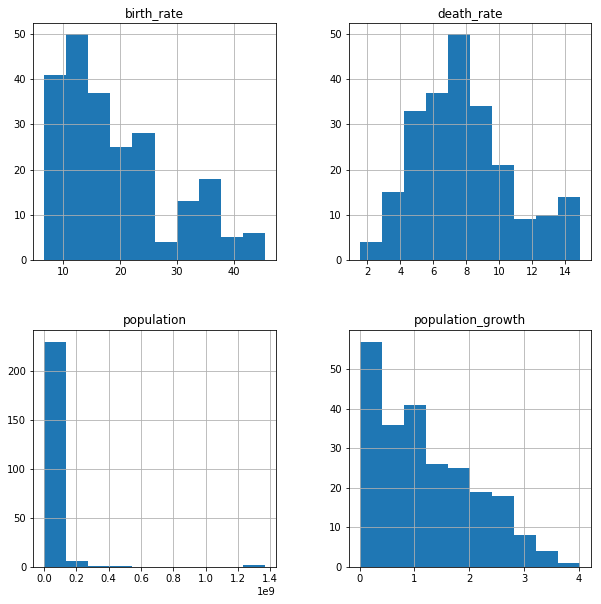

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q6, conn).hist(ax=ax)

## Which countries have the highest population density?

In [40]:
q7 = "select name, cast(population as float)/cast(area as float) density from facts order by density desc limit 20"
pd.read_sql_query(q7, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


In [41]:
q7 = '''select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q7, conn)

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
5,92436,1.24,15.85,5.69
6,43431886,0.93,16.64,7.33
7,3056382,0.15,13.61,9.34
8,22751014,1.07,12.15,7.14
9,8665550,0.55,9.41,9.42
